In [2]:
import pandas as pd
import pandas_profiling
from pandas import Series
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

%matplotlib inline

In [3]:
df = pd.read_csv("./train.csv")
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


- client_id: идентификатор клиента
- education: уровень образования
- sex: пол заёмщика
- age: возраст заёмщика
- car: флаг наличия автомобиля
- car_type: флаг автомобиля-иномарки
- decline_app_cnt: количество отказанных прошлых заявок
- good_work: флаг наличия «хорошей» работы
- bki_request_cnt: количество запросов в БКИ
- home_address: категоризатор домашнего адреса
- work_address: категоризатор рабочего адреса
- income: доход заёмщика
- foreign_passport: наличие загранпаспорта
- default: наличие дефолта

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [5]:
profile = pandas_profiling.ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 169.35it/s]


In [6]:
df.client_id.nunique()

73799

<AxesSubplot:>

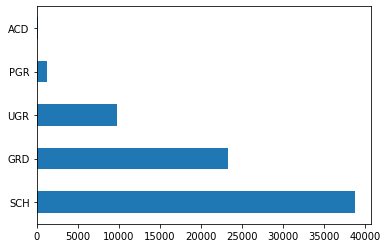

In [7]:
df.education.value_counts().plot.barh()

<AxesSubplot:xlabel='default', ylabel='age'>

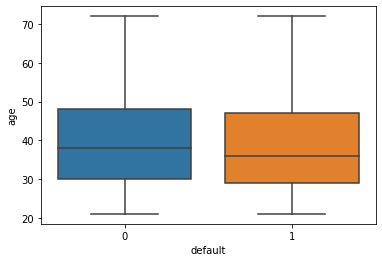

In [9]:
sns.boxplot(
    y=df.age,
    x="default",
    data=df,
)

<AxesSubplot:xlabel='default', ylabel='decline_app_cnt'>

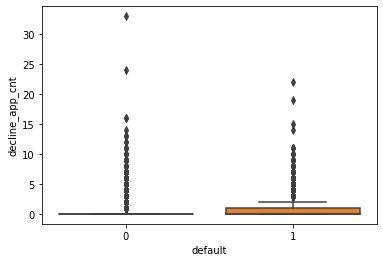

In [10]:
sns.boxplot(
    y=df.decline_app_cnt,
    x="default",
    data=df,
)

<AxesSubplot:xlabel='default', ylabel='bki_request_cnt'>

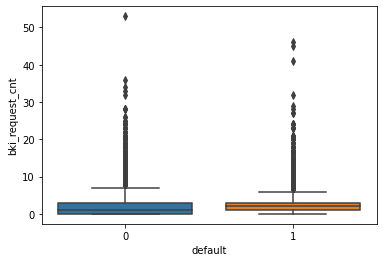

In [11]:
sns.boxplot(
    y=df.bki_request_cnt,
    x="default",
    data=df,
)

<AxesSubplot:xlabel='default', ylabel='income'>

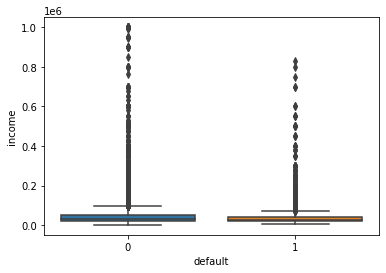

In [12]:
sns.boxplot(
    y=df.income,
    x="default",
    data=df,
)

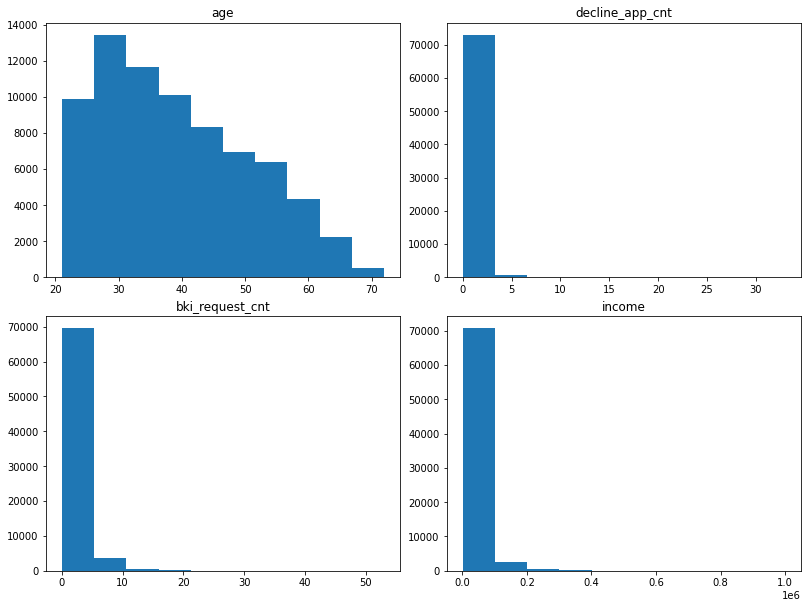

In [15]:
num_features = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

def plot_grid(nplots, max_cols=2, figsize=(800/72, 600/72)):
    ncols = min(nplots, max_cols)
    nrows = (nplots // ncols) + min(1, (nplots % ncols))
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, constrained_layout=True)
    if nrows == 1:
        return axs
    return [axs[index // ncols, index % ncols] for index in range(nplots)]

for column, ax in zip(num_features, plot_grid(len(num_features))):
    df[column].plot(kind='hist', ax=ax, title=column)
    ax.set_ylabel(None)

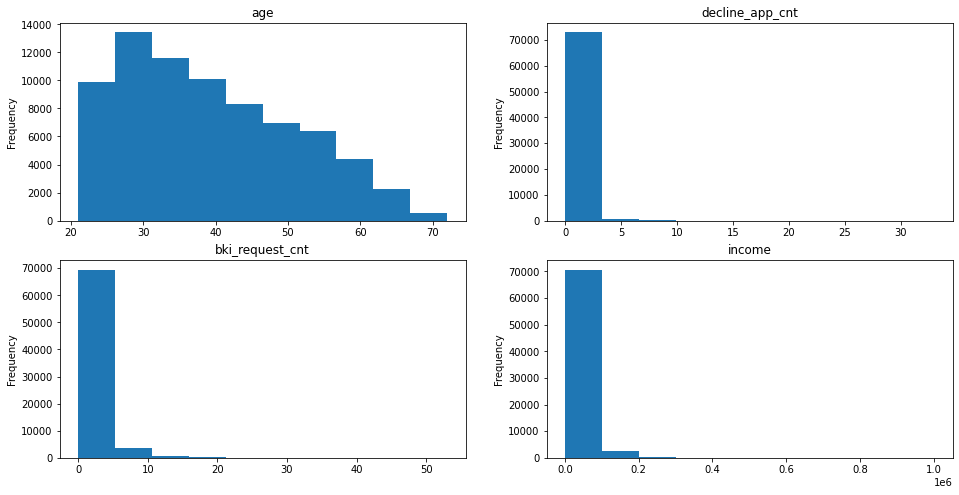

In [18]:
h_size = 2
v_size = 2
fig, axes = plt.subplots(v_size, h_size, figsize=(h_size * 8, v_size * 4))
pos_h, pos_v = 0, 0
for column in num_features:
    df[column].plot(kind='hist', ax=axes[pos_v][pos_h], title=column)
    pos_h += 1
    if pos_h > h_size - 1:
        pos_v += 1
        pos_h = 0
plt.show()

In [23]:
for column in num_features:
    df[f"{column}_log"] = df[column].apply(lambda w: np.log(w + 1))


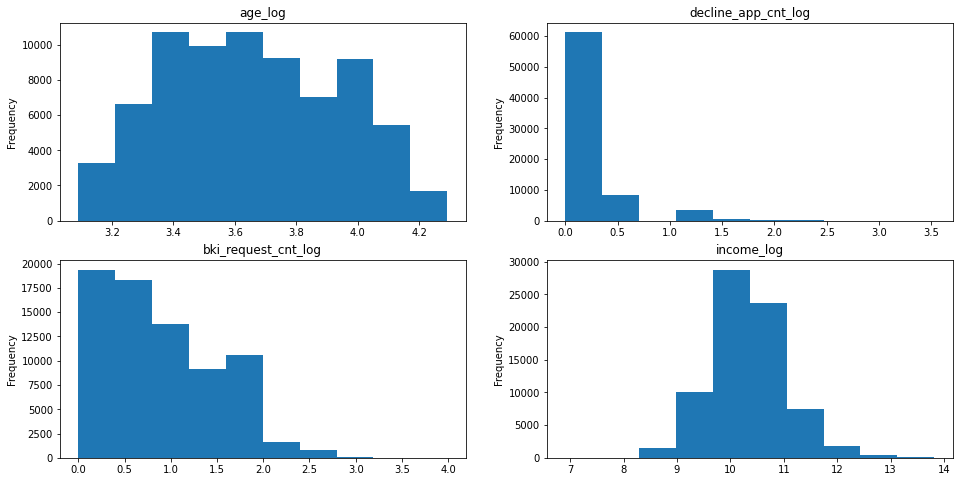

In [24]:
h_size = 2
v_size = 2
fig, axes = plt.subplots(v_size, h_size, figsize=(h_size * 8, v_size * 4))
pos_h, pos_v = 0, 0
for column in num_features:
    df[f"{column}_log"].plot(kind='hist', ax=axes[pos_v][pos_h], title=f"{column}_log")
    pos_h += 1
    if pos_h > h_size - 1:
        pos_v += 1
        pos_h = 0
plt.show()

<AxesSubplot:>

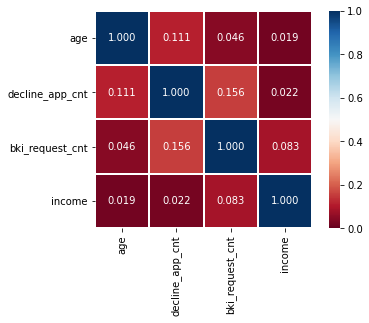

In [22]:
sns.heatmap(df[num_features].corr().abs(), vmin=0, vmax=1, square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

<AxesSubplot:>

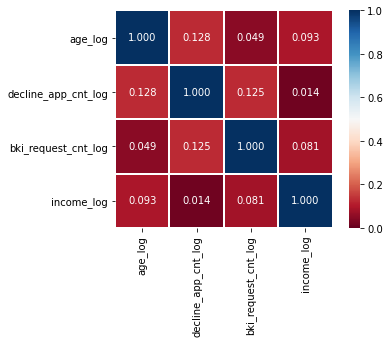

In [26]:
sns.heatmap(df[[f"{x}_log" for x in num_features]].corr().abs(),
    vmin=0, vmax=1, square=True,annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu",
)

<AxesSubplot:>

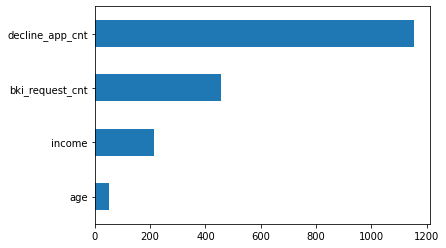

In [27]:
imp_num = pd.Series(f_classif(df[[f"{x}_log" for x in num_features]], df['default'])[0], index = num_features)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [28]:
label_encoder = LabelEncoder()

mapped_sex = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [30]:
df.education.fillna('UNK', inplace=True)

In [39]:
cat_cols = ['education', "home_address", "work_address"]
bool_cols = ["car", "car_type", "foreign_passport", "sex", "good_work"]

for column in bool_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df.head()


<AxesSubplot:>

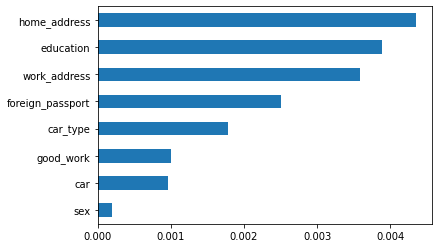

In [34]:
imp_cat = Series(mutual_info_classif(df[bool_cols + cat_cols], df['default'],
                                     discrete_features =True), index = bool_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [40]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [41]:
X_cat.shape

(73799, 12)

In [50]:
num_cols = ["age", "decline_app_cnt", "income", "bki_request_cnt"]
num_cols_log = ["age_log", "decline_app_cnt_log", "income_log", "bki_request_cnt_log"]

X_num = StandardScaler().fit_transform(df[num_cols_log].values)


In [51]:
X = np.hstack([X_num, df[bool_cols].values, X_cat])
Y = df['default'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

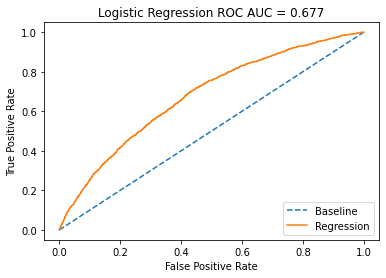

In [56]:
model = LogisticRegression(C=21)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV


In [55]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/m

Лучшее Penalty: l2
Лучшее C: 21.544346900318832
